In [ ]:
# fake note identification
import matplotlib.pyplot as plt


In [ ]:
#libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# import tensorflow as tf


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



(1372, 4)
(1097, 4)
(1097, 2)
n_dim 4
epoch :  0  -  cost:  0.8507735  - MSE:  1.5890044000623786 - Train Accuracy:  0.55423886
epoch :  1  -  cost:  0.7605608  - MSE:  1.342132145385589 - Train Accuracy:  0.5615314
epoch :  2  -  cost:  0.7236219  - MSE:  1.2452199959445782 - Train Accuracy:  0.5642662
epoch :  3  -  cost:  0.7068014  - MSE:  1.2045441599850815 - Train Accuracy:  0.56608933
epoch :  4  -  cost:  0.69651866  - MSE:  1.1908729242881755 - Train Accuracy:  0.57429355
epoch :  5  -  cost:  0.68755394  - MSE:  1.1939754978358315 - Train Accuracy:  0.5824977
epoch :  6  -  cost:  0.678461  - MSE:  1.2058357169688092 - Train Accuracy:  0.58796716
epoch :  7  -  cost:  0.66816556  - MSE:  1.2238209482160063 - Train Accuracy:  0.6162261
epoch :  8  -  cost:  0.65677553  - MSE:  1.2449173129842257 - Train Accuracy:  0.67092067
epoch :  9  -  cost:  0.6444267  - MSE:  1.2674867613632042 - Train Accuracy:  0.70464903
epoch :  10  -  cost:  0.632598  - MSE:  1.288173650222279 - Tra

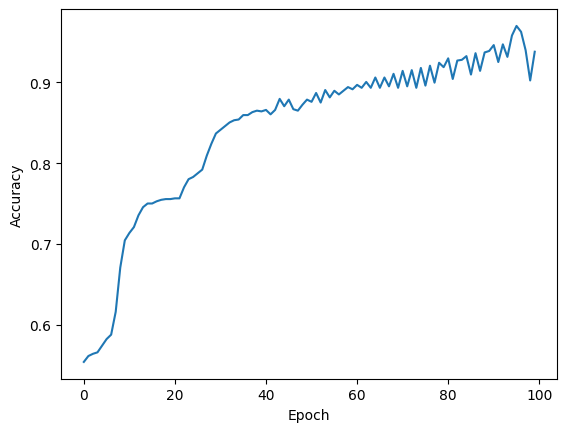

Test Accuracy:  0.95272726
MSE: 1.5328


In [ ]:

# Reading the dataset
def read_dataset():
    df = pd.read_csv("/content/sample_data/BankNote_Authentication.csv")
    # print(len(df.columns))
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]

    # Encode the dependent variable
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)


# Define the encoder function.
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode


# Read the dataset
X, Y = read_dataset()

# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, Y, random_state=1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

# Inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
# print(test_x.shape)

# Define the important parameters and variable to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "/content/sample_data"

# Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])


# Define the model
def multilayer_perceptron(x, weights, biases):

    # Hidden layer with RELU activationsd
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    # Hidden layer with sigmoid activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    # Hidden layer with RELU activation
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)

    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer


# Define the weights and the biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

# Initialize all the variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Call your model defined
y = multilayer_perceptron(x, weights, biases)

# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

# Calculate the cost and the accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print("Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)

    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

#Plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

# Print the final mean square error

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

In [ ]:
#To Test Model

Let's break down the provided code into manageable sections and explain each part in detail.

## Importing Libraries
Before the code snippet begins, there should be imports for the necessary libraries. Though not shown in your snippet, typically you'd expect the following:

```python
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
```

## 1. Reading the Dataset

### Function: `read_dataset()`
This function reads the dataset from a CSV file and processes it for machine learning.

```python
def read_dataset():
    df = pd.read_csv("/content/sample_data/BankNote_Authentication.csv")
    # df now contains the data from the CSV file.
    X = df[df.columns[0:4]].values  # Selects the first 4 columns as features.
    y = df[df.columns[4]]  # Selects the 5th column as the target variable.

    # Encode the dependent variable
    Y = one_hot_encode(y)
    print(X.shape)  # Print the shape of X to confirm dimensions.
    return (X, Y)  # Returns the features and encoded target.
```

- `pd.read_csv()`: Reads the CSV file and loads it into a DataFrame.
- `X = df[df.columns[0:4]].values`: Extracts the first four columns of the DataFrame as the features.
- `y = df[df.columns[4]]`: Extracts the fifth column as the target variable.
- `Y = one_hot_encode(y)`: Converts the target variable into a one-hot encoded format using the `one_hot_encode` function.

### Function: `one_hot_encode(labels)`
This function encodes the target variable into a one-hot encoded format.

```python
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode
```

- `n_labels`: The total number of labels.
- `n_unique_labels`: The number of unique labels.
- `one_hot_encode`: An array initialized with zeros of shape (number of labels, number of unique labels).
- `one_hot_encode[np.arange(n_labels), labels] = 1`: Sets the corresponding position to 1 for each label, creating a one-hot encoded matrix.

### Using the `read_dataset` Function

```python
X, Y = read_dataset()
```
- This line calls the `read_dataset` function and assigns the returned features and labels to `X` and `Y`.

## 2. Shuffling and Splitting the Dataset

### Shuffling
```python
X, Y = shuffle(X, Y, random_state=1)
```
- `shuffle`: Shuffles the dataset to mix up the rows and ensure that the model does not learn any order-related biases.
- `random_state`: Ensures the shuffling is reproducible.

### Splitting
```python
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
```
- `train_test_split`: Splits the data into training and testing sets.
- `test_size=0.20`: 20% of the data is reserved for testing.
- `random_state`: Ensures the split is reproducible.

### Inspecting Shapes
```python
print(train_x.shape)
print(train_y.shape)
```
- Prints the shapes of the training feature and target datasets to verify the split.

## 3. Setting Up Neural Network Parameters

### Parameters and Variables
```python
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]  # Number of features
print("n_dim", n_dim)
n_class = 2  # Number of classes (binary classification)
model_path = "/content/sample_data"
```
- `learning_rate`: The rate at which the model updates its weights.
- `training_epochs`: The number of times the model will iterate over the training data.
- `cost_history`: An empty array to store the cost values during training.
- `n_dim`: Number of input features.
- `n_class`: Number of output classes.
- `model_path`: Path where the model will be saved.

### Network Architecture
```python
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4
```
- These variables define the number of neurons in each hidden layer of the network.

## 4. Defining the Placeholders and Variables

### Placeholders for Input and Output
```python
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
```
- `x`: Placeholder for input data (features).
- `W`: Weights for the output layer, initialized to zeros.
- `b`: Biases for the output layer, initialized to zeros.
- `y_`: Placeholder for the target data (labels).

### Weights and Biases for the Layers
```python
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
```
- These dictionaries define the weights and biases for each layer. They are initialized using a truncated normal distribution to break symmetry and ensure proper training.

## 5. Building the Model

### Multilayer Perceptron Function
```python
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)

    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer
```
- This function defines the forward pass of the neural network.
- `layer_1`, `layer_2`, `layer_3`, `layer_4`: Hidden layers with ReLU activation functions, except for `layer_4` which uses a sigmoid activation.
- `out_layer`: The final output layer with a linear activation (no non-linearity applied).

## 6. Training the Model

### Model Output
```python
y = multilayer_perceptron(x, weights, biases)
```
- Calls the `multilayer_perceptron` function to get the predicted output `y`.

### Cost Function and Optimizer
```python
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
```
- `cost_function`: Defines the cost function using softmax cross-entropy.
- `training_step`: Uses Gradient Descent to minimize the cost function.

### Initializing Variables and Session
```python
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
```
- `init`: Operation to initialize all TensorFlow variables.
- `saver`: To save the model after training.
- `sess`: TensorFlow session to execute the graph.

### Training Loop
```python
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)

    print('epoch : ', epoch, ' - ', '

cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
```
- `for epoch in range(training_epochs)`: Iterates through each epoch.
- `sess.run(training_step, feed_dict={x: train_x, y_: train_y})`: Runs the training step.
- `cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})`: Computes the cost.
- `cost_history = np.append(cost_history, cost)`: Appends the cost to the history.
- `correct_prediction`: Determines if the predictions are correct.
- `accuracy`: Computes the accuracy.
- `pred_y = sess.run(y, feed_dict={x: test_x})`: Predicts the output on the test set.
- `mse = tf.reduce_mean(tf.square(pred_y - test_y))`: Computes the Mean Squared Error (MSE) on the test set.
- `mse_history.append(mse_)`: Appends the MSE to the history.
- Prints the epoch, cost, MSE, and training accuracy.

### Saving the Model
```python
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)
```
- Saves the trained model to the specified path.

## 7. Visualizing Training Results

### Plotting Accuracy
```python
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
```
- Plots the accuracy over epochs to visualize the training progress.

### Final Accuracy and MSE
```python
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))
```
- Computes and prints the final accuracy on the test set.
- Computes and prints the final Mean Squared Error on the test set.

## Summary
This code reads a dataset, preprocesses it, defines a neural network using TensorFlow, trains the network, and evaluates its performance. The main steps include:
1. Reading and preparing the dataset.
2. Defining the neural network architecture.
3. Training the model using Gradient Descent.
4. Evaluating the model's accuracy and error.
5. Saving the trained model.
6. Visualizing the training results.

If you have any specific questions about any part of the code, feel free to ask!